In [208]:
import numpy as np
import matplotlib.pyplot as plt
import time



## On regarde comment converge la finesse de l'aile

In [209]:
# On récupère la finesse sur chaque pas de temps
def get_infos_simu(file_name):
    # récupère les infos du fichier texte sur les finesses :
     with open(file_name, 'r') as f: 
            L_finesse = []
            f.readline()
            for ligne in f :
                a,b, cx, cy = ligne.split()
                cx, cy = -float(cx), -float(cy)
                if cx * cy == 0. : 
                     L_finesse.append(0) 
                else:
                    L_finesse.append(cy/cx)
     return np.array(L_finesse)


In [210]:
# On récupère les résultats de la simu
def plot_result(file_name, numero):
    result_simus = get_infos_simu(file_name)[:1115]
    print(f"On a {result_simus.shape[0]} incréments")
    print(f"La moyenne de finesse est de {round(result_simus.mean(),3)}")
    plt.plot(result_simus, color='b')
    plt.grid()
    plt.xlabel('Itération')
    plt.ylabel('Cy/Cx')
    plt.title(f"Convergence de Cy/Cx simu{numero}")


# On récupère les résultats de la simu
def plot_result_filtre(file_name, numero, nombre_filtre):
    result_simus = get_infos_simu(file_name)
    result_mean = [np.mean(result_simus[i:i+nombre_filtre]) for i in range(0, len(result_simus)-nombre_filtre)]
    plt.plot(result_mean, color='b')
    plt.grid()
    plt.xlabel('Itération')
    plt.ylabel('Cy/Cx')
    plt.title(f"Convergence de Cy/Cx simu{numero} (moyenne glissante de {nombre_filtre} valeur)")


# On regarde quand les rapports des n derniers et n d'avant est inférieur à un certain pourcentage 
    
def percetage_trace2(file_name, nombre_filtre, percetage_end):
    result_simu = get_infos_simu(file_name)
    result_mean = [np.mean(result_simu[i:i+nombre_filtre]) for i in range(0, len(result_simu)-nombre_filtre)]
    for k in range( 2*nombre_filtre,len(result_mean)):
        if -percetage_end < result_mean[k]/result_mean[k-nombre_filtre] - 1 < percetage_end :
            return k
        
    return None

def percetage_trace(file_name, nombre_filtre, percetage_end):
    # donne avec l'écart à la moyenne
    result_simu = get_infos_simu(file_name)
    result_mean = [np.mean(result_simu[i:i+nombre_filtre]) for i in range(0, len(result_simu)-nombre_filtre)] # On lisse 
    for k in range(2* nombre_filtre,len(result_mean)):
        if np.std(result_mean[k-nombre_filtre:k]) < percetage_end :
            return k
        
    return None
       

def plot_percetage_trois(file_name, nombre_filtre, percetage_end, axs, nb_axs, color='red') :
    numero = percetage_trace(file_name, nombre_filtre, percetage_end)
    if numero is None :
        pass
    else :
        axs[nb_axs].axvline(x=numero,linestyle='--', label=f'itteration = {numero} : {100*percetage_end} % ', color=color)
        plt.legend()


def percetage_trace_trois(file_name, nombre_filtre, percetage_end):
    # donne avec l'écart à la moyenne
    result_simu = get_infos_simu(file_name)
    result_mean = [np.mean(result_simu[i:i+nombre_filtre]) for i in range(0, len(result_simu)-nombre_filtre)] # On lisse 
    for k in range(2* nombre_filtre,len(result_mean)):
        if np.std(result_mean[k-nombre_filtre:k]) < percetage_end :
            return k
        
    return None
       

def plot_percetage(file_name, nombre_filtre, percetage_end, color='red') :
    numero = percetage_trace(file_name, nombre_filtre, percetage_end)
    if numero is None :
        pass
    else :
        plt.axvline(x=numero,linestyle='--', label=f'itteration = {numero} : {100*percetage_end} % ', color=color)
        plt.legend()


def plot_trois(file_name, numero):
    # en entier
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))
    result_simu = get_infos_simu(file_name)
    axs[0].plot(result_simu, color='b')
    axs[0].grid()
    axs[0].set_xlabel('Itération')
    axs[0].set_ylabel('Cy/Cx')
    axs[0].set_title(f"Convergence de Cy/Cx simu{numero}")

    # filtré de 50
    result_mean_50 = [np.mean(result_simu[i:i+50]) for i in range(0, len(result_simu)-50)]
    axs[1].plot(result_mean_50, color='b')
    axs[1].grid()
    axs[1].set_xlabel('Itération')
    axs[1].set_ylabel('Cy/Cx')
    axs[1].set_title(f"Convergence de Cy/Cx simu{numero} (moyenne glissante de {50} valeur)")

    plot_percetage_trois(file_name=file_name, nombre_filtre=50, percetage_end=0.01,axs =axs, nb_axs=1, color= 'green')
    plot_percetage_trois(file_name=file_name, nombre_filtre=50, percetage_end=0.001,axs =axs, nb_axs=1, color= 'red')


    # filtré de 20
    result_mean_50 = [np.mean(result_simu[i:i+20]) for i in range(0, len(result_simu)-20)]
    axs[2].plot(result_mean_50, color='b')
    axs[2].grid()
    axs[2].set_xlabel('Itération')
    axs[2].set_ylabel('Cy/Cx')
    axs[2].set_title(f"Convergence de Cy/Cx simu{numero} (moyenne glissante de {20} valeur)")

    plot_percetage_trois(file_name=file_name, nombre_filtre=20, percetage_end=0.01,axs =axs, nb_axs=2, color= 'green')
    plot_percetage_trois(file_name=file_name, nombre_filtre=20, percetage_end=0.001, axs=axs,nb_axs=2, color= 'red')


    plt.tight_layout()




### On code un algo pour finir la simulation

In [211]:
# On fait un algo pour terminer ça 

def fin_algo(file_name, nombre_filtre, percetage_end):
    longueur = 0
    # On attend d'avoir assez d'ittération
    while longueur < 2*nombre_filtre:
        time.sleep(30)
        result_simu = get_infos_simu(file_name)
        longueur = len(result_simu)

    # On s'arrête quand le rapport des 50 derniers sur les 50 d'avant est assez petit
    end = False
    while not end :
        time.sleep(5)
        result_simu = get_infos_simu(file_name)
        if result_simu[-nombre_filtre:].mean()/result_simu[-2*nombre_filtre:-nombre_filtre].mean() < 1+percetage_end and result_simu[-nombre_filtre:].mean()/result_simu[-2*nombre_filtre:-nombre_filtre].mean() > (1-percetage_end) :
            end = True
        print(result_simu[-nombre_filtre:].mean()/result_simu[-2*nombre_filtre:-nombre_filtre].mean())
    return 'fin'

### Simu 1 Re = 10^3 naca 34

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


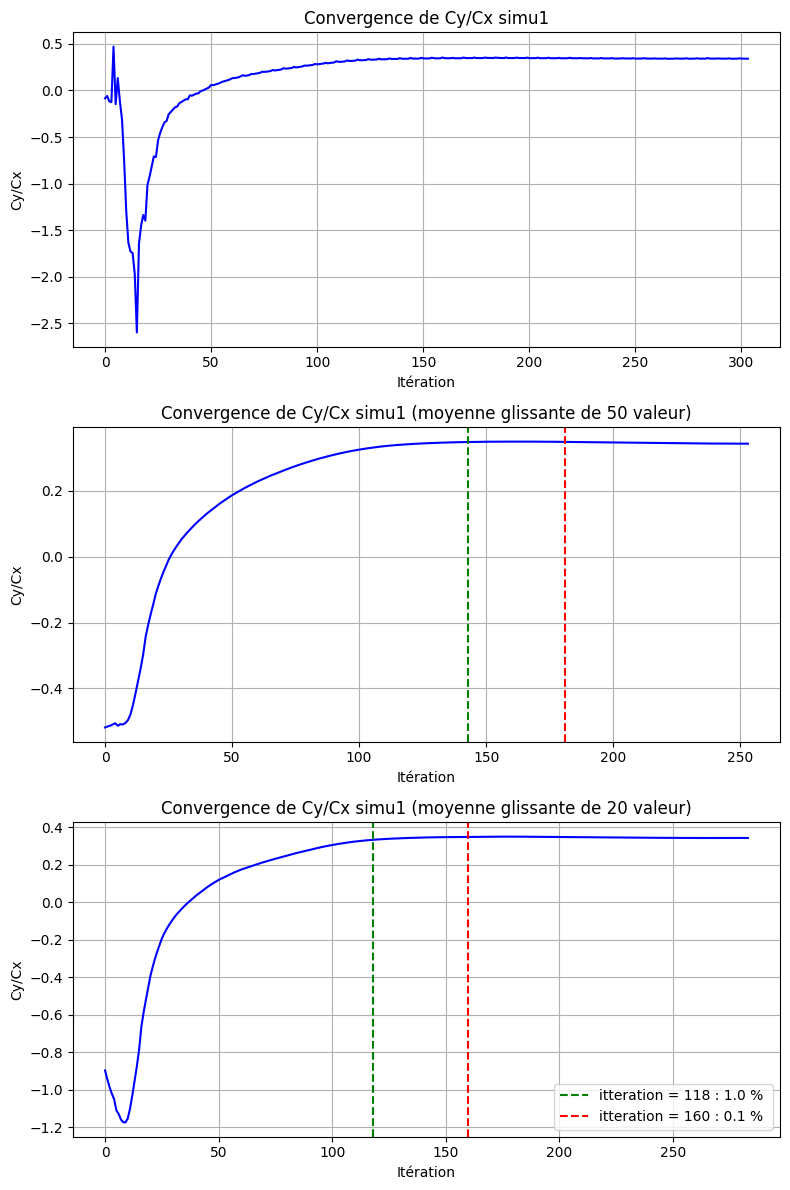

In [212]:
plot_trois(file_name='test_solve/simu1/Efforts.txt', numero=1)

### Simu 2 Re=10^3 naca naca 54

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


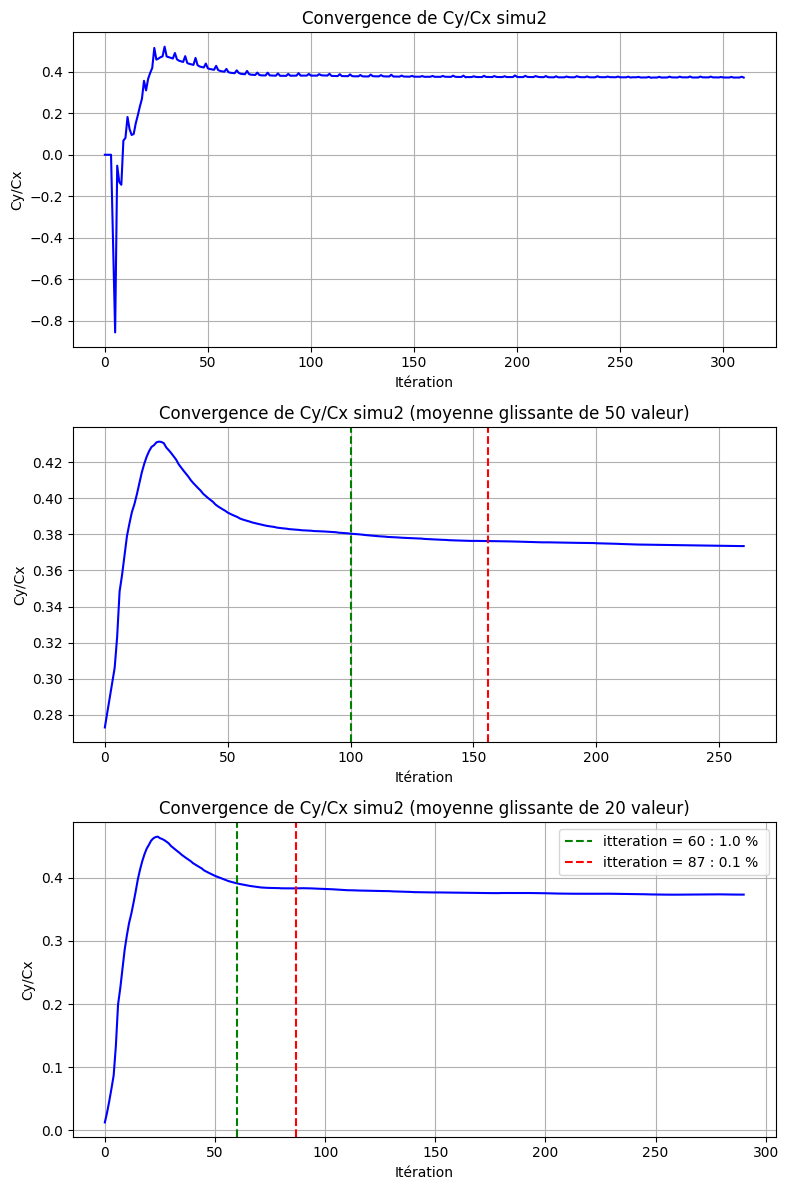

In [215]:
plot_trois(file_name='test_solve/simu2/Efforts.txt', numero=2)

### Bilan

On test en ne prenant que les 200 premières valeurs et on moyenne sur les 50 dernières